<a href="https://colab.research.google.com/github/hellofrinkky/train-basic-data-visualizations/blob/main/midterm_project_1660903954_tisanu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

upload file

In [3]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
name = list(uploaded.keys())[0]
df = pd.read_csv(name)
print(name, " ", df.shape);
df.head()

Saving concert_ticket_sales_ticketphase.csv to concert_ticket_sales_ticketphase.csv
concert_ticket_sales_ticketphase.csv   (120, 8)


,order_id,customer_id,concert_id,order_date,ticket_qty,payment_status,check_in,ticket_type
0,1,1436,1,2025-10-08,5,paid,Y,Regular
1,2,1153,3,2025-10-30,4,paid,N,Last Call
2,3,1467,2,2025-10-11,2,pending,Y,Early Bird
3,4,1087,1,2025-11-14,5,failed,N,Regular
4,5,1382,2,2025-12-03,4,failed,Y,Last Call


In [4]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
name = list(uploaded.keys())[0]
df2 = pd.read_csv(name)
print(name, " ", df2.shape);
df2.head()

Saving concerts_generated.csv to concerts_generated.csv
concerts_generated.csv   (3, 9)


,concert_id,concert_name,artist,genre,venue,country,event_date,organizer,rating
0,1,Melody Night,DJ Luna,Indie,ICONSIAM Hall,Singapore,NaN,KPopStars,NaN
1,3,Dream Pop Live,Miles Tan,Indie,Impact Arena,Singapore,2025-11-15,NaN,NaN
2,2,Dream Pop Live,DJ Luna,Rock,Esplanade,Singapore,2025-12-20,LiveAsia,5.0


In [5]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
name = list(uploaded.keys())[0]
df3 = pd.read_csv(name)
print(name, " ", df3.shape);
df3.head()

Saving customers_generated.csv to customers_generated.csv
customers_generated.csv   (116, 8)


,customer_id,name,email,country,age,membership_type,registration_date,status
0,1436,Emma Park,liam@gmail.com,Singapore,33.0,Regular,2024-02-14,active
1,1153,Sara Wong,emma@gmail.com,Thailand,NaN,Premium,2022-11-05,inactive
2,1467,Noah Lee,emma@gmail.com,Japan,22.0,Regular,2023-06-10,inactive
3,1087,Kenji Ito,olivia@gmail.com,Philippines,31.0,VIP,2022-11-05,active
4,1382,Emma Park,liam@gmail.com,Philippines,33.0,Regular,2023-06-10,active


Audit n Cleaning

In [6]:
print('\nn --- concert ticket sale ---')
print(df.info())
print('\n missing data of concert sale ')
missing1 = df.isnull().sum()
missing_pct1 = df.isnull().sum()/len(df) * 100
missing_df1 = pd.DataFrame({'missing_count': missing1, 'missing_pct': missing_pct1})
print(missing_df1)
print('\nn --- concert ---')
print(df2.info())
print('\n missing data of concert data')
missing2 = df2.isnull().sum()
missing_pct2 = df2.isnull().sum()/len(df2) * 100
missing_df2 = pd.DataFrame({'missing_count': missing2, 'missing_pct': missing_pct2})
print(missing_df2)
print('\nn --- customer ---')
print(df.info())
print('\n missing data of customer ')
missing3 = df3.isnull().sum()
missing_pct3 = df3.isnull().sum()/len(df3) * 100
missing_df3 = pd.DataFrame({'missing_count': missing3, 'missing_pct': missing_pct3})
print(missing_df3)


n --- concert ticket sale ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        120 non-null    int64 
 1   customer_id     120 non-null    int64 
 2   concert_id      120 non-null    int64 
 3   order_date      120 non-null    object
 4   ticket_qty      120 non-null    int64 
 5   payment_status  119 non-null    object
 6   check_in        120 non-null    object
 7   ticket_type     120 non-null    object
dtypes: int64(4), object(4)
memory usage: 7.6+ KB
None

 missing data of concert sale 
                missing_count  missing_pct
order_id                    0     0.000000
customer_id                 0     0.000000
concert_id                  0     0.000000
order_date                  0     0.000000
ticket_qty                  0     0.000000
payment_status              1     0.833333
check_in                    0     0.0

In [7]:
def audit_missingdata(df,tablename):
  print('\n --- ({tablename})')
  print(df.info())
  print(f'missing value of ({tablename})')
  missing = df.isnull().sum()
  missing_pct = (missing/len(df)) * 100
  missing_df = pd.DataFrame({'missing_count': missing, 'missing_pct': missing_pct})
  missing_cols = missing_df[missing_df['missing_count'] > 0]
  print(missing_cols)
  if not missing_cols.empty:
    print(f'\n --- unique of missing ({tablename}) ---')
    for col in missing_cols.index:
            print(f"\n {col} (unique {df[col].nunique()})")
            print(df[col].unique())
audit_missingdata(df, "customers_generated.csv")
audit_missingdata(df2, "concerts_generated.csv")
audit_missingdata(df3, "concert_ticket_sales_ticketphase.csv")


 --- ({tablename})
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        120 non-null    int64 
 1   customer_id     120 non-null    int64 
 2   concert_id      120 non-null    int64 
 3   order_date      120 non-null    object
 4   ticket_qty      120 non-null    int64 
 5   payment_status  119 non-null    object
 6   check_in        120 non-null    object
 7   ticket_type     120 non-null    object
dtypes: int64(4), object(4)
memory usage: 7.6+ KB
None
missing value of (customers_generated.csv)
                missing_count  missing_pct
payment_status              1     0.833333

 --- unique of missing (customers_generated.csv) ---

 payment_status (unique 4)
['paid' 'pending' 'failed' 'payed' nan]

 --- ({tablename})
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 9 columns):
 #   Colum

In [8]:
import pandas as pd
import numpy as np
try:
    df_sales = pd.read_csv("concert_ticket_sales_ticketphase.csv")
    df_concerts = pd.read_csv("concerts_generated.csv")
    df_customers = pd.read_csv("customers_generated.csv")
    print("Data loading successful.")
except FileNotFoundError as e:
    print(f"Error: One or more files not found: {e}")
    exit()

median_age = df_customers['age'].median()
df_customers['age'] = df_customers['age'].fillna(median_age)
df_customers['email'] = df_customers['email'].fillna('No Email')
df_customers['registration_date'] = df_customers['registration_date'].fillna('Unknown')
df_customers['status'] = df_customers['status'].fillna('Unknown')

df_customers['membership_type'] = df_customers['membership_type'].str.lower()
df_customers['status'] = df_customers['status'].str.lower()

unknown_reg_dates = df_customers['registration_date'] == 'Unknown'
df_customers.loc[~unknown_reg_dates, 'registration_date'] = \
    pd.to_datetime(df_customers.loc[~unknown_reg_dates, 'registration_date'], errors='coerce')

df_customers.drop_duplicates(subset=['customer_id'], keep='first', inplace=True)
print("df_customers cleaned.")

df_concerts['organizer'] = df_concerts['organizer'].fillna('Unknown Organizer')
df_concerts['rating'] = df_concerts['rating'].fillna(0.0)
df_concerts['event_date'] = df_concerts['event_date'].fillna('TBD')
df_concerts['venue'] = df_concerts['venue'].fillna('Unknown Venue')
tbd_dates = df_concerts['event_date'] == 'TBD'
df_concerts.loc[~tbd_dates, 'event_date'] = \
    pd.to_datetime(df_concerts.loc[~tbd_dates, 'event_date'], errors='coerce')

df_concerts.drop_duplicates(subset=['concert_id'], keep='first', inplace=True)
print("df_concerts cleaned.")

df_sales = df_sales[df_sales['ticket_qty'] > 0].copy()

df_sales['payment_status'] = df_sales['payment_status'].str.lower().str.strip()
df_sales['payment_status'] = df_sales['payment_status'].replace('payed', 'paid')
df_sales['payment_status'] = df_sales['payment_status'].fillna('pending')

df_sales['check_in'] = df_sales['check_in'].replace('Maybe', 'N')
df_sales['check_in'] = df_sales['check_in'].str.upper().str.strip()

df_sales['ticket_type'] = df_sales['ticket_type'].str.lower().str.strip()


df_sales['order_date'] = pd.to_datetime(df_sales['order_date'], errors='coerce')

df_sales.drop_duplicates(subset=['order_id'], keep='first', inplace=True)
TICKET_PRICES = {
    'regular': 50,
    'early bird': 60,
    'last call': 40,
    'unknown': 50
}
df_sales['price'] = df_sales['ticket_type'].map(TICKET_PRICES)
df_sales['revenue'] = np.where(
    df_sales['payment_status'] == 'paid',
    df_sales['ticket_qty'] * df_sales['price'],
    0
)
print("df_sales cleaned.")

print("\nAll DataFrames are now cleaned and ready for analysis.")

Data loading successful.
df_customers cleaned.
df_concerts cleaned.
df_sales cleaned.

All DataFrames are now cleaned and ready for analysis.


--- KPI 2.3: Demographics of Early Bird Success (Paid) ---
  membership_type  Total_Tickets  Total_Revenue  Unique_Customer_Count  \
1         regular             37           2220                     12   
2             vip             21           1260                      6   
0         premium             10            600                      6   

   Avg_Age  
1     31.8  
2     27.3  
0     30.0  


/tmp/ipython-input-2202867280.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='membership_type', y='Unique_Customer_Count', data=kpi_demographics, palette='plasma')


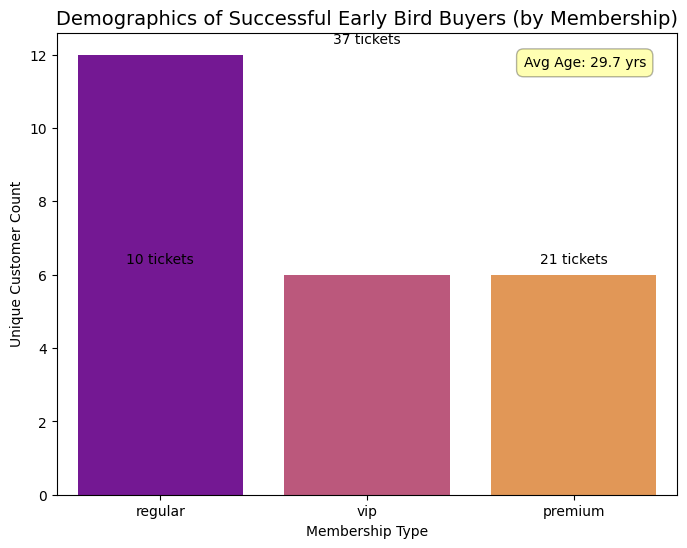

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_earlybird_success = df_sales[
    (df_sales['ticket_type'] == 'early bird') &
    (df_sales['payment_status'] == 'paid')
].copy()
df_demographics = df_earlybird_success.merge(
    df_customers[['customer_id', 'membership_type', 'age']],
    on='customer_id',
    how='left'
)
kpi_demographics = df_demographics.groupby('membership_type').agg(
    Total_Tickets=('ticket_qty', 'sum'),
    Total_Revenue=('revenue', 'sum'),
    Unique_Customer_Count=('customer_id', 'nunique'),
    Avg_Age=('age', 'mean')
).reset_index().sort_values(by='Total_Tickets', ascending=False)

print("--- KPI 2.3: Demographics of Early Bird Success (Paid) ---")
print(kpi_demographics.round(1))

plt.figure(figsize=(8, 6))
sns.barplot(x='membership_type', y='Unique_Customer_Count', data=kpi_demographics, palette='plasma')
plt.title('Demographics of Successful Early Bird Buyers (by Membership)', fontsize=14)
plt.xlabel('Membership Type')
plt.ylabel('Unique Customer Count')

plt.text(0.95, 0.95, f"Avg Age: {kpi_demographics['Avg_Age'].mean():.1f} yrs",
         transform=plt.gca().transAxes, ha='right', va='top',
         bbox=dict(boxstyle="round,pad=0.5", fc="yellow", alpha=0.3))

for index, row in kpi_demographics.iterrows():
    plt.text(index, row['Unique_Customer_Count'] + 0.3, f"{row['Total_Tickets']:.0f} tickets",
             color='black', ha="center")
plt.show()

--- KPI 2.3: Demographics of Early Bird Success (Paid) ---
  membership_type  Total_Tickets  Total_Revenue  Unique_Customer_Count  \
1         regular             37           2220                     12   
2             vip             21           1260                      6   
0         premium             10            600                      6   

   Avg_Age  
1     31.8  
2     27.3  
0     30.0  


/tmp/ipython-input-1677676859.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='membership_type', y='Unique_Customer_Count', data=kpi_demographics, palette='plasma')


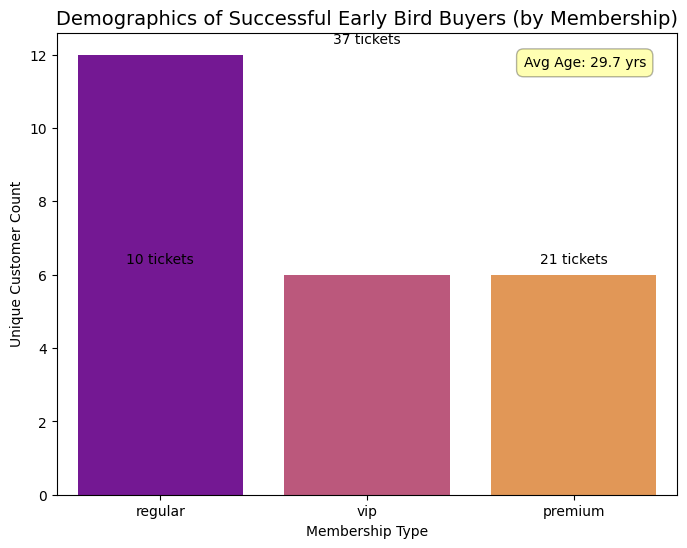

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df_earlybird_success = df_sales[
    (df_sales['ticket_type'] == 'early bird') &
    (df_sales['payment_status'] == 'paid')
].copy()

df_demographics = df_earlybird_success.merge(
    df_customers[['customer_id', 'membership_type', 'age']],
    on='customer_id',
    how='left'
)

kpi_demographics = df_demographics.groupby('membership_type').agg(
    Total_Tickets=('ticket_qty', 'sum'),
    Total_Revenue=('revenue', 'sum'),
    Unique_Customer_Count=('customer_id', 'nunique'),
    Avg_Age=('age', 'mean')
).reset_index().sort_values(by='Total_Tickets', ascending=False)

print("--- KPI 2.3: Demographics of Early Bird Success (Paid) ---")
print(kpi_demographics.round(1))

plt.figure(figsize=(8, 6))
sns.barplot(x='membership_type', y='Unique_Customer_Count', data=kpi_demographics, palette='plasma')
plt.title('Demographics of Successful Early Bird Buyers (by Membership)', fontsize=14)
plt.xlabel('Membership Type')
plt.ylabel('Unique Customer Count')

plt.text(0.95, 0.95, f"Avg Age: {kpi_demographics['Avg_Age'].mean():.1f} yrs",
         transform=plt.gca().transAxes, ha='right', va='top',
         bbox=dict(boxstyle="round,pad=0.5", fc="yellow", alpha=0.3))

# Add labels showing total tickets sold for context
for index, row in kpi_demographics.iterrows():
    plt.text(index, row['Unique_Customer_Count'] + 0.3, f"{row['Total_Tickets']:.0f} tickets",
             color='black', ha="center")
plt.show()

--- KPI 2.2: High-Risk Revenue Rate ---
     concert_name  Total_Paid_Revenue  Total_Risk_Value  Risk_Rate
1  Dream Pop Live                2280              4050      63.98
2  Dream Pop Live                2450              2820      53.51
0    Melody Night                3650              2570      41.32


/tmp/ipython-input-4161624710.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='concert_name', y='Risk_Rate', data=kpi_risk, palette='Reds_d')


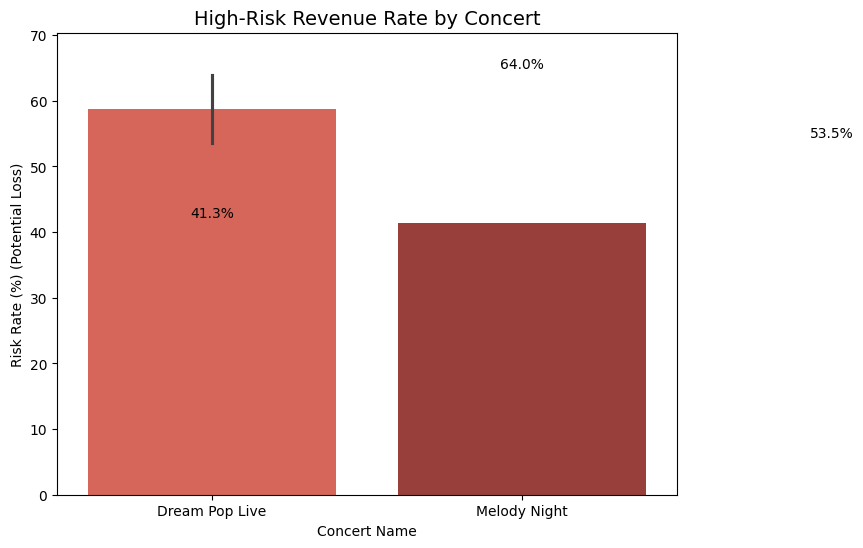

In [12]:
df_sales['potential_revenue'] = df_sales['ticket_qty'] * df_sales['price']

kpi_risk = df_sales.groupby('concert_id').agg(
    Total_Paid_Revenue=('revenue', 'sum'),
    Total_Potential_Revenue=('potential_revenue', 'sum'),
    Total_Risk_Value=('potential_revenue', lambda x: x[df_sales['payment_status'] != 'paid'].sum())
).reset_index()

kpi_risk['Risk_Rate'] = (kpi_risk['Total_Risk_Value'] / kpi_risk['Total_Potential_Revenue']) * 100

kpi_risk = kpi_risk.merge(
    df_concerts[['concert_id', 'concert_name']],
    on='concert_id',
    how='left'
)
kpi_risk.sort_values(by='Risk_Rate', ascending=False, inplace=True)

print("--- KPI 2.2: High-Risk Revenue Rate ---")
print(kpi_risk[['concert_name', 'Total_Paid_Revenue', 'Total_Risk_Value', 'Risk_Rate']].round(2))

plt.figure(figsize=(8, 6))
sns.barplot(x='concert_name', y='Risk_Rate', data=kpi_risk, palette='Reds_d')
plt.title('High-Risk Revenue Rate by Concert', fontsize=14)
plt.xlabel('Concert Name')
plt.ylabel('Risk Rate (%) (Potential Loss)')
plt.ylim(0, kpi_risk['Risk_Rate'].max() * 1.1)

for index, row in kpi_risk.iterrows():
    plt.text(index, row['Risk_Rate'] + 1, f"{row['Risk_Rate']:.1f}%", color='black', ha="center")

plt.show()
